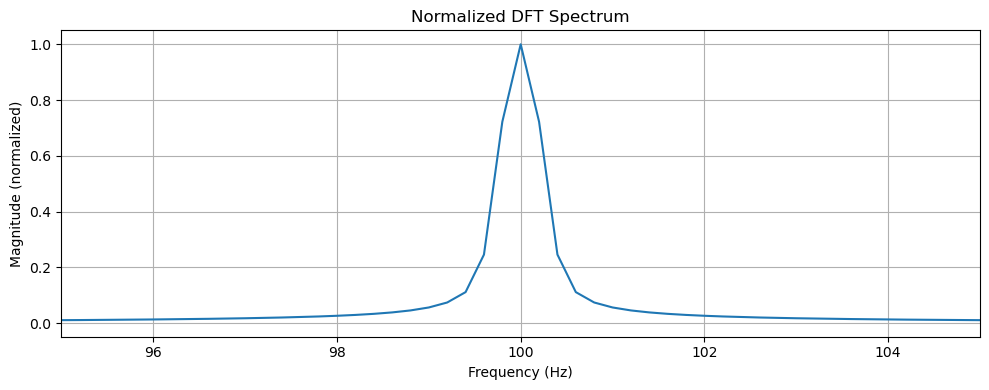

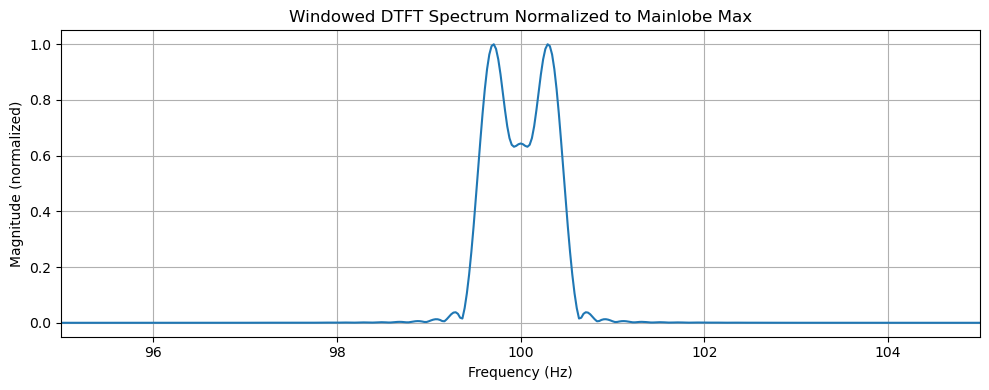

In [12]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.fft import fft, fftfreq
from scipy.signal import get_window, freqz

# Enable inline plotting in Jupyter
%matplotlib inline

f1, f2, f3 = 300, 300.25, 299.75  # Hz (these are near fs, will alias)
fs = 400                         # Sampling frequency
N = 2000                         # Number of samples
t = np.arange(N) / fs           # Time vector

# Generate signal: 3 aliased sine waves
x = np.sin(2 * np.pi * f1 * t) + np.sin(2 * np.pi * f2 * t) + np.sin(2 * np.pi * f3 * t)
x = x / np.max(np.abs(x))       

# Compute DFT
X = fft(x)
X_mag = np.abs(X[:N//2])
X_mag_norm = X_mag / np.max(X_mag)  # Normalize

freqs = fftfreq(N, 1/fs)[:N//2]

# Plot normalized DFT spectrum
plt.figure(figsize=(10, 4))
plt.plot(freqs, X_mag_norm)
plt.title("Normalized DFT Spectrum")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (normalized)")
plt.grid(True)
plt.xlim(95, 105)
plt.tight_layout()
plt.show()

# Windowed DTFT (using Hann window)
window = get_window('hann', N)
x_win = x * window

# High-resolution DTFT using freqz
w, H = freqz(x_win, worN=8192, fs=fs)
H_mag = np.abs(H) / np.max(np.abs(H))  # Normalize

# Plot windowed DTFT spectrum
plt.figure(figsize=(10, 4))
plt.plot(w, H_mag)
plt.title("Windowed DTFT Spectrum Normalized to Mainlobe Max")
plt.xlabel("Frequency (Hz)")
plt.ylabel("Magnitude (normalized)")
plt.grid(True)
plt.xlim(95, 105)
plt.tight_layout()
plt.show()
